***3.1.1도표 그리기***

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/wonbinchoi/Downloads/EuStockMarkets.csv', 
                 index_col='Unnamed: 0'
                 )
df.head()

,DAX,SMI,CAC,FTSE
1,1628.75,1678.1,1772.8,2443.6
2,1613.63,1688.5,1750.5,2460.2
3,1606.51,1678.6,1718.0,2448.2
4,1621.04,1684.1,1708.1,2470.4
5,1618.16,1686.6,1723.1,2484.7


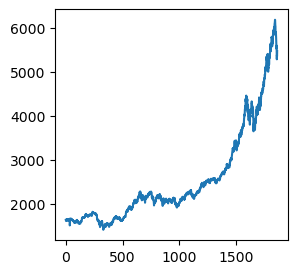

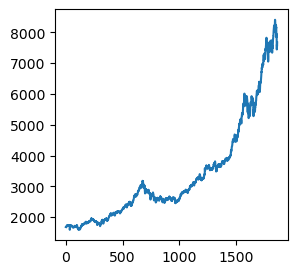

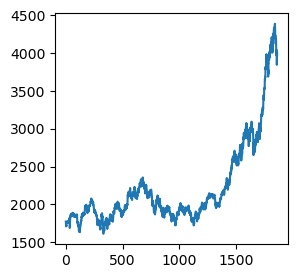

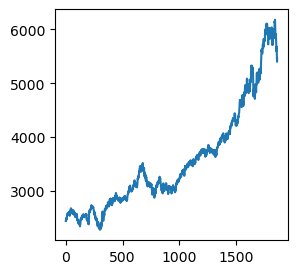

In [25]:
for col in df.columns:
    fig,axes = plt.subplots(figsize=(3,3))
    plt.plot(df[col])
    plt.show()

In [30]:
df.shape

(1860, 4)

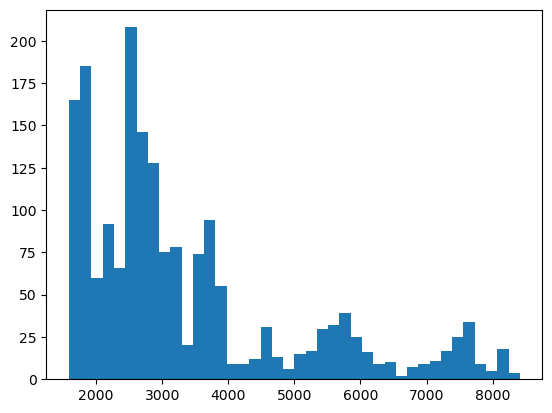

In [40]:
plt.hist(df['SMI'], bins=40)
plt.show()

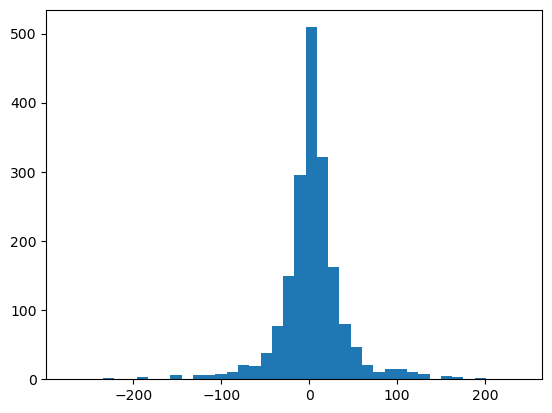

In [44]:
plt.hist(df['SMI'].diff(), bins=40)
plt.show()

***산점도***

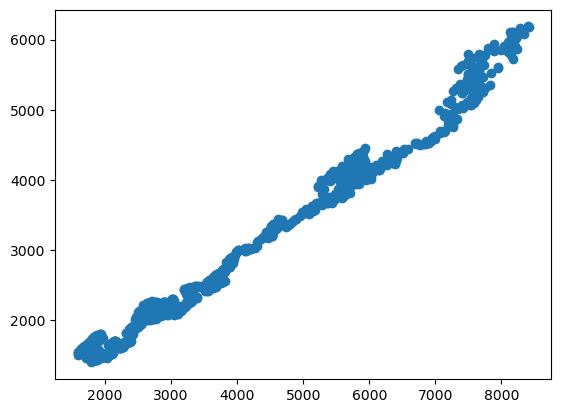

In [45]:
plt.scatter(df['SMI'], df['DAX'])

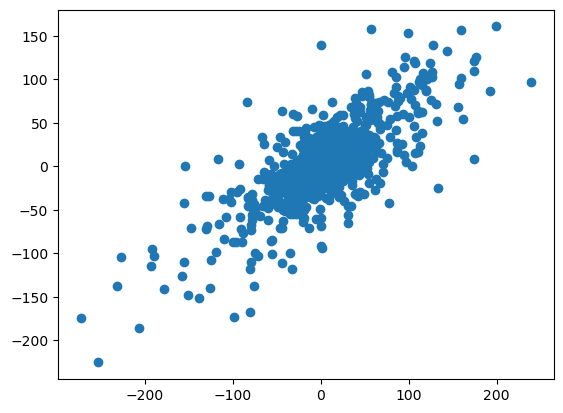

In [46]:
plt.scatter(df['SMI'].diff(), df['DAX'].diff())

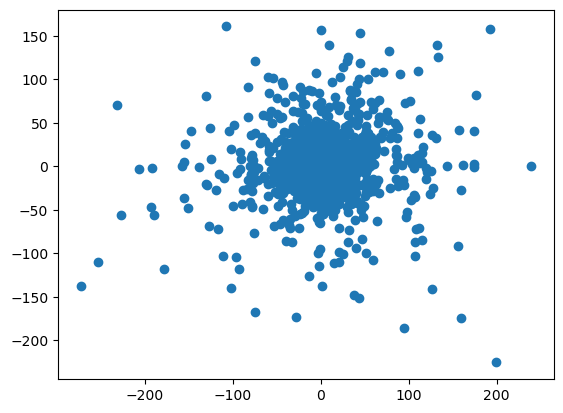

In [56]:
# lag 적용
plt.scatter(df['SMI'].shift(-1).diff(), df['DAX'].diff())

***3.2 시계열에 특화된 탐색법***

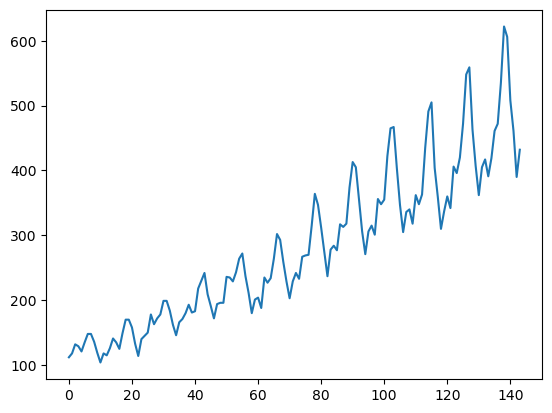

In [60]:
df = pd.read_csv('/Users/wonbinchoi/Downloads/AirPassengers.csv')
plt.plot(df['#Passengers'])
# 평균값이 지속적으로 증가
# 최고점과 최저점의 폭 증가 
# 강한 계절성을 보임 

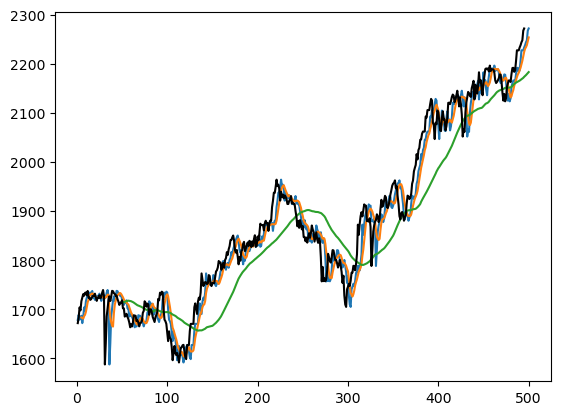

In [188]:
# 롤링 윈도
import numpy as np
import pandas as pd
df = pd.read_csv('/Users/wonbinchoi/Downloads/EuStockMarkets.csv', 
                 index_col='Unnamed: 0'
                 )

plt.plot(df['SMI'][:500])
plt.plot((df['SMI'][:500]).rolling(5).mean())
plt.plot((df['SMI'][:500]).rolling(50).mean())
plt.plot((df['SMI'][:500]).shift(), 'k')

In [196]:
l = [1,5,6,5,2,0,np.nan,7,8,2,5,6,6,2,5,6,4,2]
l = pd.Series(l)
l = l.fillna(0)
l.rolling(4).mean()

0      NaN
1      NaN
2      NaN
3     4.25
4     4.50
5     3.25
6     1.75
7     2.25
8     3.75
9     4.25
10    5.50
11    5.25
12    4.75
13    4.75
14    4.75
15    4.75
16    4.25
17    4.25
dtype: float64

***자기상관***

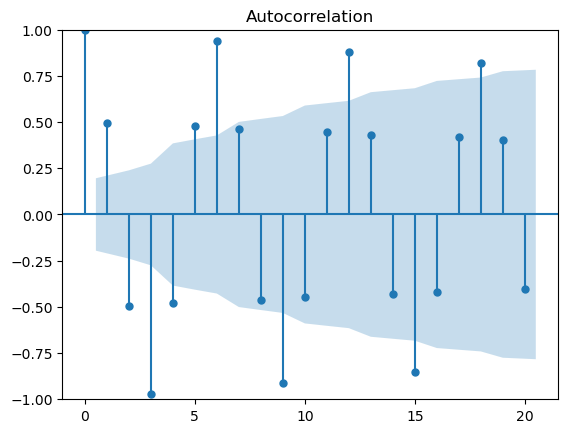

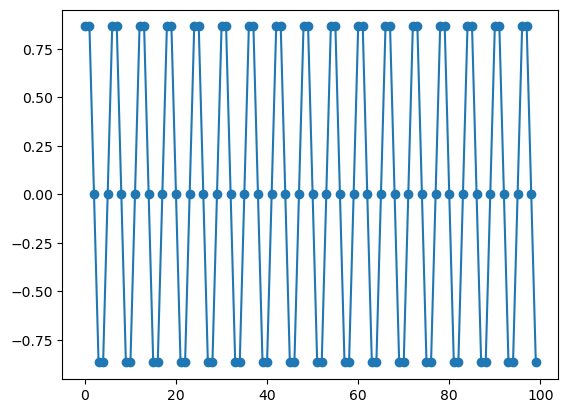

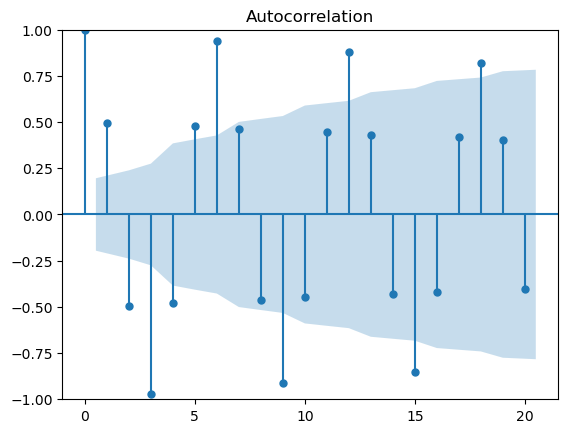

In [206]:
# acf 그래프
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

x = np.arange(1,100+1)
x = pd.Series(x)
y = np.sin((x*np.pi)/3)

plt.plot(y, 'o-')
plot_acf(y)


In [218]:
np.correlate(y.values, y.shift(1).values, )

array([nan])

In [225]:
y_shifted = y.shift(1)
y_shifted = y_shifted.fillna(0)
np.corrcoef(y, y_shifted)

array([[1.        , 0.49614125],
       [0.49614125, 1.        ]])

In [226]:
y_shifted = y.shift(2)
y_shifted = y_shifted.fillna(0)
np.corrcoef(y, y_shifted)

array([[ 1.      , -0.496743],
       [-0.496743,  1.      ]])

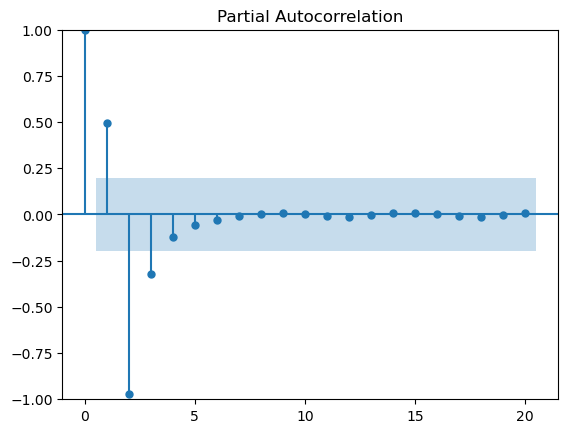

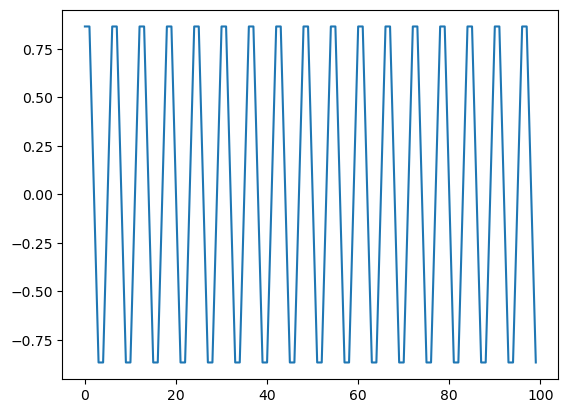

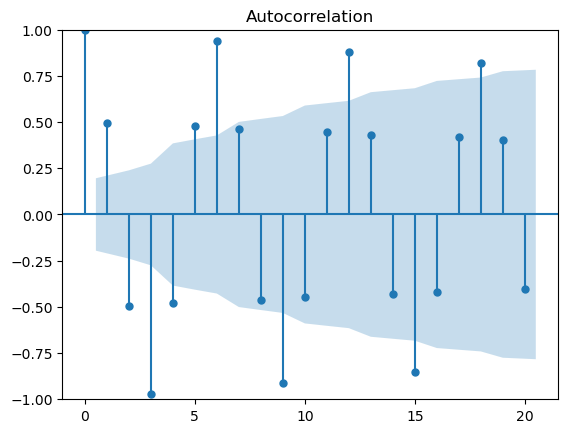

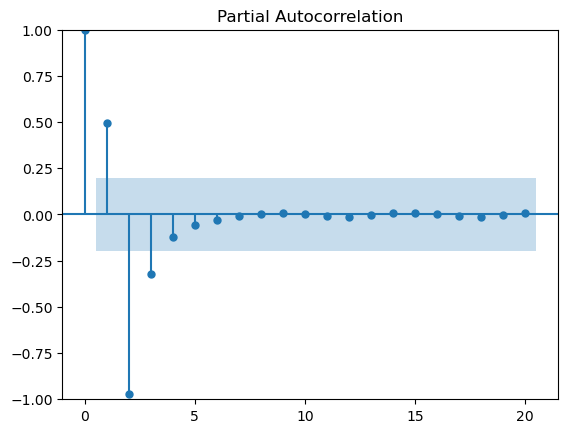

In [235]:
# pcaf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
y1 = np.sin(x*np.pi/3)
plt.plot(y1)
plot_acf(y1)
plot_pacf(y1, method='ywm')

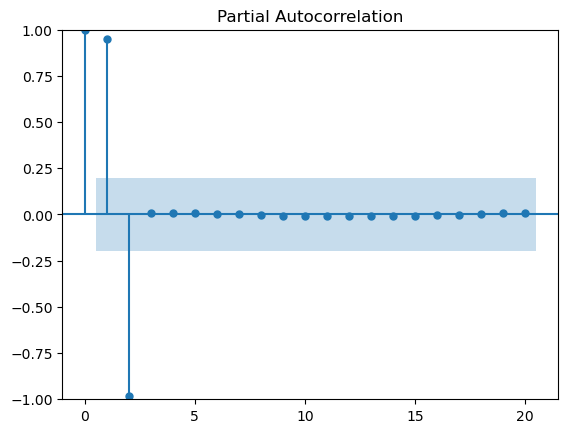

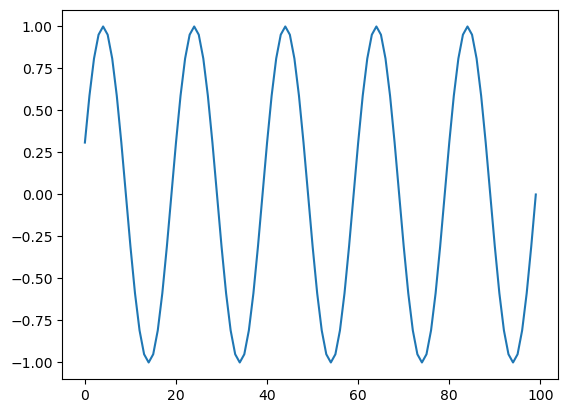

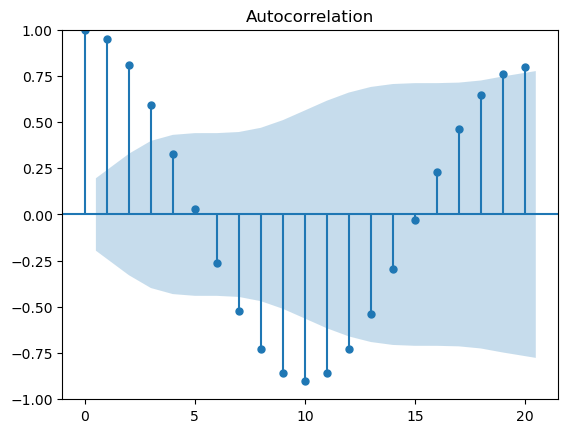

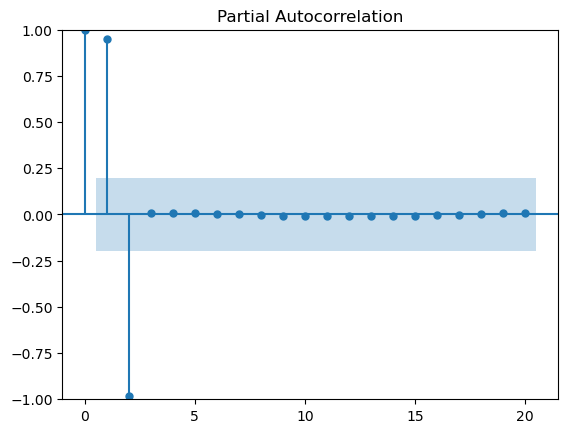

In [234]:
y2 = np.sin(x*np.pi/10)
plt.plot(y2)
plot_acf(y2)
plot_pacf(y2, method='ywm')

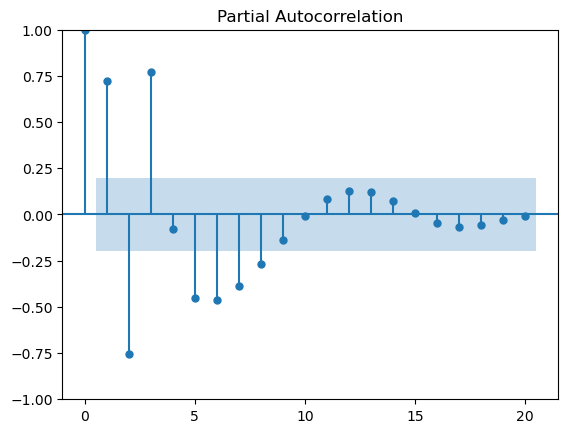

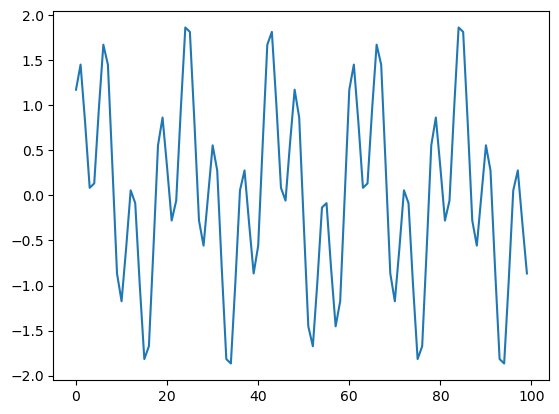

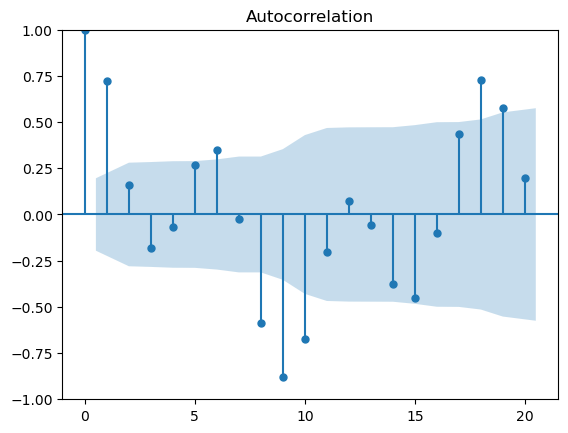

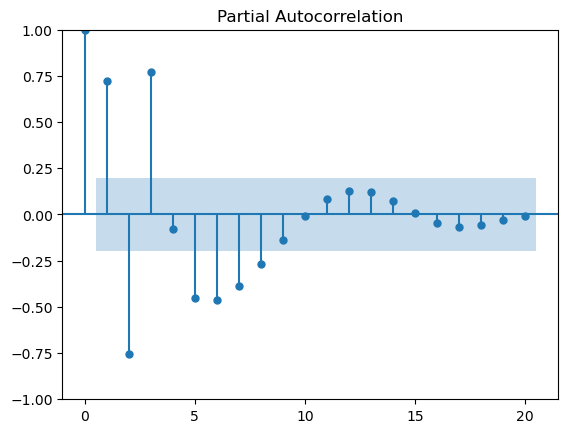

In [237]:
y = y1 + y2
plt.plot(y)
plot_acf(y)
plot_pacf(y, method='ywm')

/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


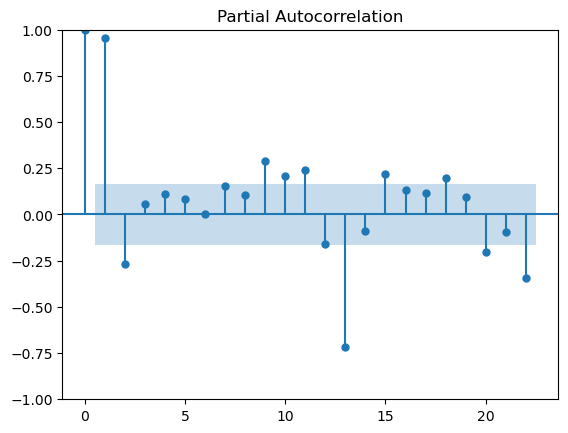

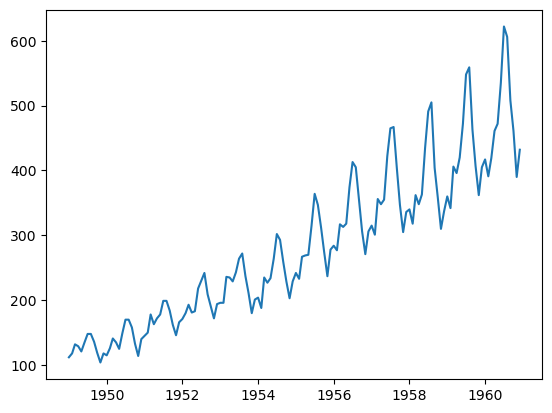

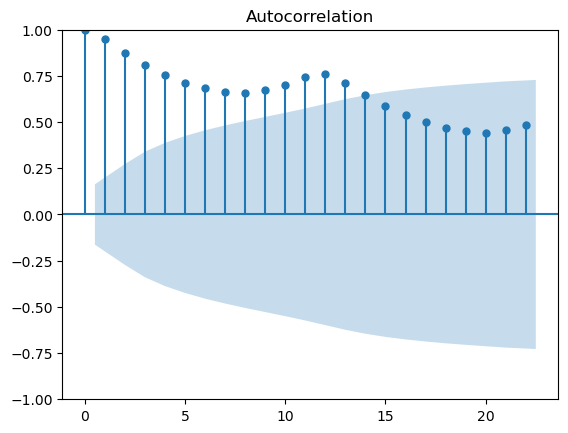

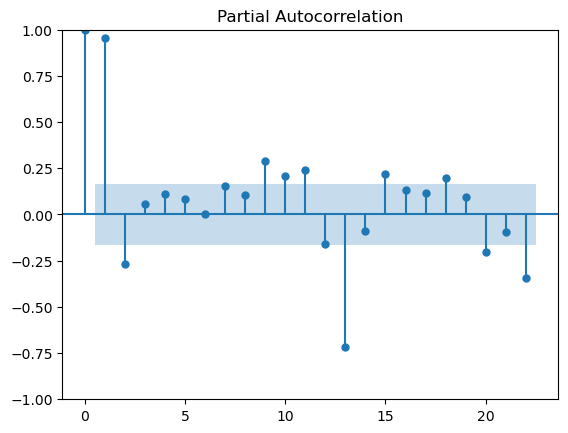

In [244]:
air = pd.read_csv('/Users/wonbinchoi/Downloads/AirPassengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air = air.set_index('Month')
plt.plot(air)
plot_acf(air)
plot_pacf(air)

***3.3 시각화***

In [251]:
import plotly.express as px

df = pd.read_csv('/Users/wonbinchoi/Downloads/donations.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.shape)
df.head()

(2676, 3)


,amount,timestamp,user
0,25.0,2017-11-12 11:13:44,0.0
1,50.0,2015-08-25 19:01:45,0.0
2,25.0,2015-03-26 12:03:47,0.0
3,50.0,2016-07-06 12:24:55,0.0
4,50.0,2016-05-11 18:13:04,1.0


In [256]:
# Gantt chart
df_gantt = df.groupby('user')['timestamp'].agg(['min', 'max'])
df_gantt.columns = ['start', 'end']
px.timeline(df_gantt[:20], x_start='start', x_end='end', y=df_gantt[:20].index)

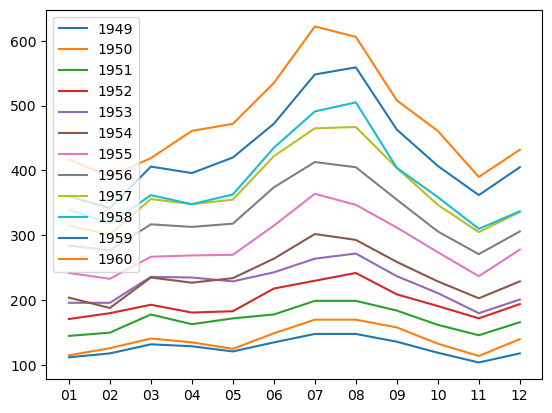

In [281]:
# 2차원 시각화
import matplotlib.colors as mcolors

df = pd.read_csv('/Users/wonbinchoi/Downloads/AirPassengers.csv')
df['year'] = df['Month'].str.split('-', expand=True)[0]
df['month'] = df['Month'].str.split('-', expand=True)[1]
df.columns = ['Month', 'passengers', 'year', 'month']


plt.subplots()
for idx, year in enumerate(df['year'].unique()):
    tmp = df[df['year'] == year]
    plt.plot(tmp['month'], tmp['passengers'], label=year)
plt.legend()
plt.show()


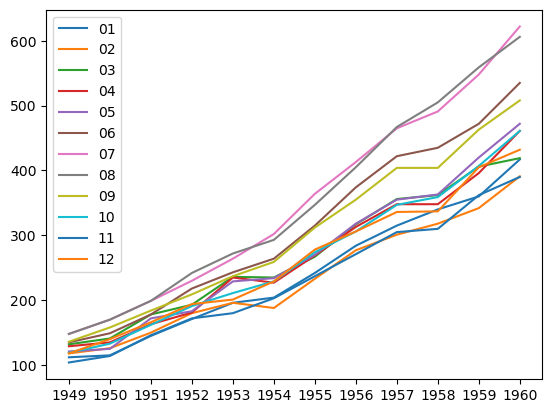

In [282]:
plt.subplots()
for idx, month in enumerate(df['month'].unique()):
    tmp = df[df['month'] == month]
    plt.plot(tmp['year'], tmp['passengers'], label=month)
plt.legend()
plt.show()

In [297]:
import plotly.graph_objects as go

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=432, noise=0)
color = (t - t.min()) / (t.max() - t.min())


color_list = [year/10 for _ in range(len(df['month'].unique())) for year in range(len(df['year'].unique()))]

data = go.Scatter3d(
    x=df['month'],
    y=df['year'],
    z=df['passengers'],
    mode='markers',
    marker_color= color_list
)

fig = go.Figure(data=[data])
fig.show()

In [291]:
df.shape[0] * 3

432